In [1]:
import warnings
warnings.filterwarnings ('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

from requests import get
from bs4 import BeautifulSoup
import os
import json
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import acquire
import prepare
from env import github_token

### Find Top Language Used - Done
### Scrape body of README.md - In Progress
### Put into DataFrame - Not Done at all

**Find readme languages**

**Functions to acquire data**

In [2]:
def make_dictionary():
    headers = {'user-agent': 'Codeup Bayes Instructor Example'}
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    return {'title': title,
            'body': body,
            'language': language
            }

In [3]:
#make_dictionary()

In [4]:
def get_links():
    url = 'https://github.com/trending'
    headers = {'User-Agent': 'Codeup Data Science Student'}
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    urls = []
    
    for h1 in soup.find_all('h1'):
        urls.append((re.sub(r'\s', '',h1.text)))
    urls.pop(0)
    return urls

In [5]:
get_links()

['marblexu/PythonPlantsVsZombies',
 'redox-os/orbtk',
 'getify/You-Dont-Know-JS',
 'saket/Press',
 'AIDungeon/AIDungeon',
 'bytefury/crater',
 'andrews1022/web-development-2020-course-list',
 'alyssaxuu/flowy',
 'infostreams/db',
 'HuaweiJoke/Huawei-Joke',
 'manchenkoff/skillbox-chat',
 'facebookresearch/VideoPose3D',
 'TheAlgorithms/Python',
 'karpathy/pytorch-normalizing-flows',
 'sdmg15/Best-websites-a-programmer-should-visit',
 'wuyouzhuguli/SpringAll',
 'Risk3sixty-Labs/geoapi',
 'kdn251/interviews',
 'google-research/ALBERT',
 'AobingJava/JavaFamily',
 'rclone/rclone',
 'CoatiSoftware/Sourcetrail',
 'serverless/serverless',
 'goldbergyoni/nodebestpractices',
 'banzaicloud/bank-vaults']

In [6]:
def get_urls():
    urls = ['https://github.com/collections/made-in-africa',
       'https://github.com/collections/web-games',
       'https://github.com/collections/probot-apps',
       'https://github.com/collections/social-impact',
       'https://github.com/collections/devops-tools',
       'https://github.com/collections/game-engines',
       'https://github.com/collections/hacking-minecraft',
       'https://github.com/collections/learn-to-code'
      ]
    
    output = []
    
    for url in urls:
         output.extend(get_links())
    return output

In [7]:
get_urls()

['marblexu/PythonPlantsVsZombies',
 'redox-os/orbtk',
 'getify/You-Dont-Know-JS',
 'saket/Press',
 'AIDungeon/AIDungeon',
 'bytefury/crater',
 'andrews1022/web-development-2020-course-list',
 'alyssaxuu/flowy',
 'infostreams/db',
 'HuaweiJoke/Huawei-Joke',
 'manchenkoff/skillbox-chat',
 'facebookresearch/VideoPose3D',
 'TheAlgorithms/Python',
 'karpathy/pytorch-normalizing-flows',
 'sdmg15/Best-websites-a-programmer-should-visit',
 'wuyouzhuguli/SpringAll',
 'Risk3sixty-Labs/geoapi',
 'kdn251/interviews',
 'google-research/ALBERT',
 'AobingJava/JavaFamily',
 'rclone/rclone',
 'CoatiSoftware/Sourcetrail',
 'serverless/serverless',
 'goldbergyoni/nodebestpractices',
 'banzaicloud/bank-vaults',
 'marblexu/PythonPlantsVsZombies',
 'redox-os/orbtk',
 'getify/You-Dont-Know-JS',
 'saket/Press',
 'AIDungeon/AIDungeon',
 'bytefury/crater',
 'andrews1022/web-development-2020-course-list',
 'alyssaxuu/flowy',
 'infostreams/db',
 'HuaweiJoke/Huawei-Joke',
 'manchenkoff/skillbox-chat',
 'facebookre

In [8]:
def create_urls():
    output = []
    urls = get_urls()
    for url in urls:
        base_url = 'https://github.com/{}'.format(url)
        output.append(base_url)
    return output

In [9]:
create_urls()[5]

'https://github.com/bytefury/crater'

In [10]:
def make_df():
    output = []
    urls = create_urls()
    
    for url in urls:
        headers = {'user-agent': 'Codeup Bayes Instructor Example'}
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        title = urls[url]
        language = soup.select('[itemprop="programmingLanguage"]').text
        body = soup.find('div', class_='Box-body').text

        data = {'title': title,
                'body': body,
                'language': language
               }
    
    output.append(article_data)
    
    return output

In [11]:
make_df()

TypeError: list indices must be integers or slices, not str

## *data scrape json*

In [2]:
import warnings
warnings.filterwarnings ('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

from requests import get
from bs4 import BeautifulSoup
import os
import json
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import acquire
import prepare
from env import github_token

In [3]:
#acquire.scrape_github_data()

In [4]:
original_df = pd.read_json('data.json')

In [5]:
original_df

,language,readme_contents,repo
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,AIDungeon/AIDungeon
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",rclone/rclone
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,marblexu/PythonPlantsVsZombies
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",redox-os/orbtk
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,sailay1996/UAC_Bypass_In_The_Wild
5,None,# 科技爱好者周刊\n\n记录每周值得分享的科技内容，周五发布。\n\n欢迎投稿，推荐或自荐...,ruanyf/weekly
6,None,# :bulb: A Guide to Production Level Deep Lear...,alirezadir/Production-Level-Deep-Learning
7,None,"<h1 align=""center"">\n\t<br>\n\t<img width=""200...",sdmg15/Best-websites-a-programmer-should-visit
8,Jupyter Notebook,"<div align=""center"">\n<a href=""https://practic...",practicalAI/practicalAI
9,None,# Huawei-Joke\n本项目将收集因审查而被删除的关于华为公司的笑话。欢迎大家投稿。...,HuaweiJoke/Huawei-Joke


In [6]:
original_df.shape

(107, 3)

In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
language           100 non-null object
readme_contents    107 non-null object
repo               107 non-null object
dtypes: object(3)
memory usage: 2.6+ KB


In [8]:
original_df.isnull().sum()

language           7
readme_contents    0
repo               0
dtype: int64

In [9]:
original_df = original_df.dropna()

In [10]:
original_df.shape

(100, 3)

In [11]:
original_df = original_df.reset_index()

In [12]:
original_df = original_df.drop(columns='index')

In [13]:
original_df.head()

,language,readme_contents,repo
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,AIDungeon/AIDungeon
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",rclone/rclone
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,marblexu/PythonPlantsVsZombies
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",redox-os/orbtk
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,sailay1996/UAC_Bypass_In_The_Wild


In [14]:
df = original_df[['language', 'readme_contents']]

In [15]:
df.head()

,language,readme_contents
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh..."
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl..."
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...


In [16]:
# remove http, https, github, aidungeon, www, email, gmail. add to remove_stopwords

In [17]:
df.head()

,language,readme_contents
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh..."
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl..."
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...


In [18]:
df = prepare.prep_contents(df)

In [19]:
# this df shows each readme content cleaned up in a different way
#df = df.set_index('language')

In [20]:
df = df.drop(columns='readme_contents')

In [21]:
df.head()

,language,original,normalized,stemmed,lemmatized,cleaned
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,aidungeon the model for dungeon tempo...,aidungeon the model for dungeon temporarili un...,aidungeon the model for dungeon temporarily un...,aidungeon model dungeon temporarily unavailabl...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",img src https rclone org img logo light h...,img src http rclone org img logo light horizon...,img src http rclone org img logo light horizon...,img src org img logo light horizontal color sv...
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,pythonplantsvszombies simple plantsvszombies ...,pythonplantsvszombi simpl plantsvszombi game i...,pythonplantsvszombies simple plantsvszombies g...,pythonplantsvszombies simple plantsvszombies g...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",img alt orbtk width src https gitla...,img alt orbtk width src http gitlab redox org ...,img alt orbtk width src http gitlab redox org ...,img alt width src gitlab redox org redox asset...
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,uac bypass the wild windows uac bypass for...,uac bypass the wild window uac bypass for all ...,uac bypass the wild window uac bypass for all ...,uac bypass wild window uac bypass executable f...


**Explore Data**

In [22]:
percents = pd.concat(
    [df.language.value_counts(), df.language.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)
percents

,n,percent
JavaScript,25,0.25
Python,20,0.20
Ruby,9,0.09
CSS,9,0.09
Go,7,0.07
HTML,5,0.05
Java,5,0.05
TypeScript,4,0.04
C++,4,0.04
C,2,0.02


In [23]:
# drop any languge that is less than 2

In [24]:
df.language.value_counts()

JavaScript          25
Python              20
Ruby                 9
CSS                  9
Go                   7
HTML                 5
Java                 5
TypeScript           4
C++                  4
C                    2
Jupyter Notebook     2
PHP                  2
C#                   1
Rust                 1
Kotlin               1
Clojure              1
CoffeeScript         1
Haskell              1
Name: language, dtype: int64

In [25]:
# drop languages with less than 2 because stratify won't work in modeling
least = list(df.language.value_counts()[df.language.value_counts() == 1].index)
least

['C#', 'Rust', 'Kotlin', 'Clojure', 'CoffeeScript', 'Haskell']

In [26]:
# df.language[df.language=='Haskell'] # 36
# df = df.index.drop('36')
# df.language[df.language=='Rust'] # 3
# df = df.index.drop('3')
# df.language[df.language=='Clojure'] # 78
# df = df.index.drop('78')
# df.language[df.language=='Kotlin'] # 15
# df = df.index.drop('15')
# df.language[df.language=='CoffeeScript'] # 23
# df = df.index.drop('23')
# df.language[df.language=='C#'] # 16
# df = df.index.drop('16')

In [27]:
# look at count of each word individually 
raw_count = pd.Series(" ".join(df.cleaned).split()).value_counts()
raw_count

org                          634
img                          558
file                         514
src                          489
svg                          470
html                         394
code                         384
use                          364
doc                          354
href                         324
master                       316
project                      315
license                      301
cs                           292
plugin                       275
badge                        274
build                        269
using                        254
run                          249
install                      230
line                         230
png                          217
image                        211
python                       208
release                      205
version                      204
opencollective               197
example                      197
new                          196
test                         196
          

Text(0.5, 1.0, '10 most common words')

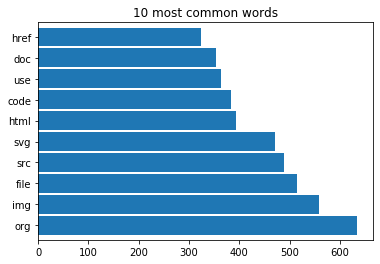

In [28]:
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common words')

In [29]:
# type(raw_count)

tf_df = pd.DataFrame({'raw_count': raw_count})

tf_df = tf_df.assign(frequency = lambda df: df.raw_count / df.raw_count.sum())

tf_df = tf_df.assign(augmented_frequency = lambda df: df.frequency / df.frequency.max())

tf_df.frequency.max()

tf_df.head()

,raw_count,frequency,augmented_frequency
org,634,0.008636,1.000000
img,558,0.007600,0.880126
file,514,0.007001,0.810726
src,489,0.006661,0.771293
svg,470,0.006402,0.741325


In [30]:
tf_df = (pd.DataFrame({'raw_count': raw_count})
         .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
         .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

tf_df.head(10)

,raw_count,frequency,augmented_frequency
org,634,0.008636,1.000000
img,558,0.007600,0.880126
file,514,0.007001,0.810726
src,489,0.006661,0.771293
svg,470,0.006402,0.741325
html,394,0.005367,0.621451
code,384,0.005230,0.605678
use,364,0.004958,0.574132
doc,354,0.004822,0.558360
href,324,0.004413,0.511041


Text(0.5, 1.0, 'IDF for a given word')

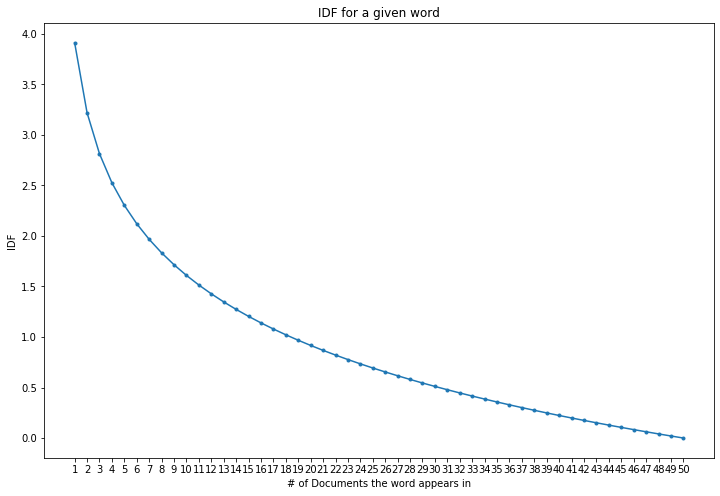

In [31]:
n_documents = 50

x_denominator = np.arange(1, n_documents + 1)
y_idf = np.log(n_documents / x_denominator)

plt.figure(figsize=(12, 8))
plt.plot(x_denominator, y_idf, marker='.')

plt.xticks(x_denominator)
plt.xlabel('# of Documents the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word')

In [32]:
print("word: com")
denom = sum([1 for doc in df.cleaned if 'com' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: com
# of occurrences:  94
# of documents:  100
idf =  0.05129329438755048


In [33]:
print("word: use")
denom = sum([1 for doc in df.cleaned if 'use' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: use
# of occurrences:  84
# of documents:  100
idf =  0.16251892949777494


In [34]:
print("word: org")
denom = sum([1 for doc in df.cleaned if 'org' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: org
# of occurrences:  82
# of documents:  100
idf =  0.18632957819149354


In [35]:
print("word: img")
denom = sum([1 for doc in df.cleaned if 'img' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: img
# of occurrences:  54
# of documents:  100
idf =  0.5978370007556204


In [36]:
print("word: file")
denom = sum([1 for doc in df.cleaned if 'file' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: file
# of occurrences:  70
# of documents:  100
idf =  0.3424903089467759


In [37]:
print("word: src")
denom = sum([1 for doc in df.cleaned if 'src' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: src
# of occurrences:  38
# of documents:  100
idf =  0.9416085398584451


In [38]:
def idf(word):
    n_occurrences = sum([1 for doc in df.cleaned if word in doc])
    n_docs = len(df.cleaned)
    idf = np.log(n_docs/n_occurrences)
    return idf

In [39]:
unique_words = pd.Series(' '.join(df.cleaned).split()).unique()

In [40]:
unique_words

array(['aidungeon', 'model', 'dungeon', ..., 'healthy', 'downstream',
       'schema'], dtype=object)

In [41]:
words = pd.DataFrame(dict(word = unique_words))
words.head()

,word
0,aidungeon
1,model
2,dungeon
3,temporarily
4,unavailable


In [42]:
words = words.assign(idf = lambda word: words.word.apply(idf))
words.head()

,word,idf
0,aidungeon,4.605170
1,model,2.302585
2,dungeon,4.605170
3,temporarily,4.605170
4,unavailable,4.605170


In [43]:
words.set_index('word').head()

,idf
word,
aidungeon,4.605170
model,2.302585
dungeon,4.605170
temporarily,4.605170
unavailable,4.605170


In [44]:
words.sort_values(by='idf', ascending=False).head()

,word,idf
0,aidungeon,4.60517
7981,prerelease,4.60517
8090,rollout,4.60517
8091,zoomin,4.60517
4180,diligently,4.60517


In [45]:
len(unique_words)

9803

In [46]:
# try with language
# try with top 25 words

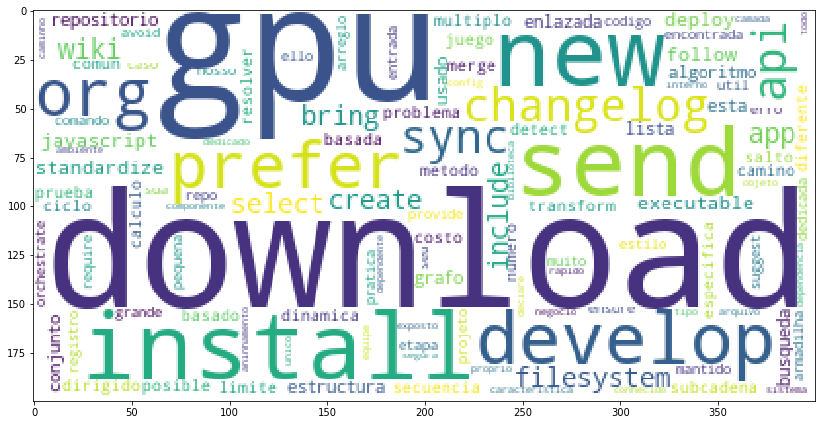

In [47]:
all_cloud = WordCloud(background_color='white').generate(' '.join(unique_words))
plt.figure(figsize=(14, 8))
plt.imshow(all_cloud)

In [48]:
import nltk
import unicodedata

def clean(string):
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    string = (
        unicodedata.normalize("NFKD", string)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", string).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [49]:
all_text = " ".join(df.cleaned)

In [50]:
all_words = clean(all_text)

In [51]:
all_words

['aidungeon',
 'model',
 'dungeon',
 'temporarily',
 'unavailable',
 'download',
 'due',
 'cost',
 'working',
 'solution',
 'read',
 'aidungeon',
 'wa',
 'built',
 'pcc',
 'byu',
 'edu',
 'dungeon',
 'creating',
 'infinitely',
 'generated',
 'text',
 'adventure',
 'deep',
 'learning',
 'language',
 'model',
 'play',
 'game',
 'colab',
 'aidungeon',
 'play',
 'game',
 'locally',
 'recommended',
 'nvidia',
 'gpu',
 'memory',
 'cuda',
 'installed',
 'gpu',
 'turn',
 'take',
 'couple',
 'minute',
 'game',
 'compose',
 'response',
 'install',
 'play',
 'locally',
 'git',
 'clone',
 'aidungeon',
 'aidungeon',
 'aidungeon',
 'install',
 'python',
 'play',
 'community',
 'aidungeon',
 'open',
 'source',
 'project',
 'question',
 'discussion',
 'contribution',
 'welcome',
 'contribution',
 'anything',
 'new',
 'package',
 'bugfixes',
 'documentation',
 'even',
 'new',
 'core',
 'feature',
 'resource',
 'website',
 'aidungeon',
 'aidungeon',
 'aidungeon',
 'twitter',
 'creator',
 'nickwalton',
 

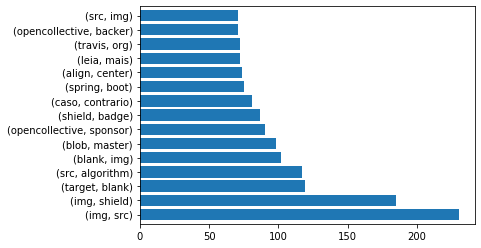

In [122]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(15).plot.barh(width=.8)

In [64]:
# length of each readme repo
all_words

['aidungeon',
 'model',
 'dungeon',
 'temporarily',
 'unavailable',
 'download',
 'due',
 'cost',
 'working',
 'solution',
 'read',
 'aidungeon',
 'wa',
 'built',
 'pcc',
 'byu',
 'edu',
 'dungeon',
 'creating',
 'infinitely',
 'generated',
 'text',
 'adventure',
 'deep',
 'learning',
 'language',
 'model',
 'play',
 'game',
 'colab',
 'aidungeon',
 'play',
 'game',
 'locally',
 'recommended',
 'nvidia',
 'gpu',
 'memory',
 'cuda',
 'installed',
 'gpu',
 'turn',
 'take',
 'couple',
 'minute',
 'game',
 'compose',
 'response',
 'install',
 'play',
 'locally',
 'git',
 'clone',
 'aidungeon',
 'aidungeon',
 'aidungeon',
 'install',
 'python',
 'play',
 'community',
 'aidungeon',
 'open',
 'source',
 'project',
 'question',
 'discussion',
 'contribution',
 'welcome',
 'contribution',
 'anything',
 'new',
 'package',
 'bugfixes',
 'documentation',
 'even',
 'new',
 'core',
 'feature',
 'resource',
 'website',
 'aidungeon',
 'aidungeon',
 'aidungeon',
 'twitter',
 'creator',
 'nickwalton',
 

In [67]:
df["readme_length"] = df.cleaned.apply(len)

In [68]:
df

,language,original,normalized,stemmed,lemmatized,cleaned,readme_length
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,aidungeon the model for dungeon tempo...,aidungeon the model for dungeon temporarili un...,aidungeon the model for dungeon temporarily un...,aidungeon model dungeon temporarily unavailabl...,1206
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",img src https rclone org img logo light h...,img src http rclone org img logo light horizon...,img src http rclone org img logo light horizon...,img src org img logo light horizontal color sv...,3289
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,pythonplantsvszombies simple plantsvszombies ...,pythonplantsvszombi simpl plantsvszombi game i...,pythonplantsvszombies simple plantsvszombies g...,pythonplantsvszombies simple plantsvszombies g...,705
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",img alt orbtk width src https gitla...,img alt orbtk width src http gitlab redox org ...,img alt orbtk width src http gitlab redox org ...,img alt width src gitlab redox org redox asset...,3541
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,uac bypass the wild windows uac bypass for...,uac bypass the wild window uac bypass for all ...,uac bypass the wild window uac bypass for all ...,uac bypass wild window uac bypass executable f...,339
5,Jupyter Notebook,"<div align=""center"">\n<a href=""https://practic...",div align center href https practicala...,div align center href http practicalai img src...,div align center href http practicalai img src...,div align center href practicalai img src raw ...,7055
6,JavaScript,# Algoritmos y Estructuras de Datos en JavaScr...,algoritmos estructuras datos javascript ...,algoritmo estructura dato javascript build sta...,algoritmos estructuras datos javascript build ...,algoritmos estructuras datos javascript build ...,14823
7,Python,"<p align=""center"">\n <img src=""https://raw.gi...",align center img src https raw github...,align center img src http raw githubusercont c...,align center img src http raw githubuserconten...,align center img src raw githubusercontent xue...,3354
8,Java,> * 原文地址：[github.com/kdn251/interviews](https:...,github com kdn interviews https github c...,github com kdn interview http github com kdn i...,github com kdn interview http github com kdn i...,kdn interview kdn interview xitu gold miner wx...,5764
9,TypeScript,"# Microfronts\n> ""One shell to rule them all, ...",microfronts one shell rule them all one s...,microfront one shell rule them all one shell b...,microfronts one shell rule them all one shell ...,one shell rule one shell bind one shell wrap l...,3242


In [104]:
df.language.value_counts()

JavaScript          25
Python              20
Ruby                 9
CSS                  9
Go                   7
HTML                 5
Java                 5
TypeScript           4
C++                  4
C                    2
Jupyter Notebook     2
PHP                  2
C#                   1
Rust                 1
Kotlin               1
Clojure              1
CoffeeScript         1
Haskell              1
Name: language, dtype: int64

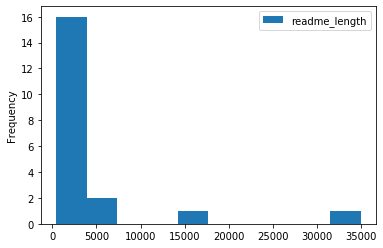

In [110]:
df[df.language == 'Python'].plot.hist()

In [115]:
df[df.language == 'Python'].sort_values(by='readme_length', ascending=False)

,language,original,normalized,stemmed,lemmatized,cleaned,readme_length
31,Python,![Black Logo](https://raw.githubusercontent.co...,black logo https raw githubusercontent com ...,black logo http raw githubusercont com psf bla...,black logo http raw githubusercontent com psf ...,logo raw githubusercontent master doc static l...,34946
42,Python,h4. Bees with Machine Guns!\n\nA utility for a...,bees with machine guns utility for arming ...,bee with machin gun util for arm creat mani be...,bee with machine gun utility for arming creati...,bee machine gun utility arming creating many b...,14253
93,Python,[![StackStorm](https://github.com/stackstorm/s...,stackstorm https github com stackstorm ra...,stackstorm http github com stackstorm raw mast...,stackstorm http github com stackstorm raw mast...,stackstorm stackstorm raw master stackstorm lo...,5546
39,Python,Git Pre-Receive Hook to Validate Commits\n====...,git pre receive hook validate commits ...,git pre receiv hook valid commit exhaust edit ...,git pre receive hook validate commits exhausti...,git pre receive hook validate commits exhausti...,4615
7,Python,"<p align=""center"">\n <img src=""https://raw.gi...",align center img src https raw github...,align center img src http raw githubusercont c...,align center img src http raw githubuserconten...,align center img src raw githubusercontent xue...,3354
82,Python,|PyPI version| |Docs badge| |Chat badge| |Buil...,pypi version docs badge chat badge build...,pypi version doc badg chat badg build statu co...,pypi version doc badge chat badge build status...,pypi version doc badge chat badge build status...,3154
41,Python,# datadesk/notebooks\n\nAll 34 of our computat...,datadesk notebooks all our computational ...,datadesk notebook all our comput notebook also...,datadesk notebook all our computational notebo...,notebook computational notebook also available...,3118
67,Python,.. image:: https://img.shields.io/pypi/v/beets...,image https img shields pypi beets svg ...,imag http img shield pypi beet svg target http...,image http img shield pypi beet svg target htt...,image img shield pypi beet svg target pypi pyt...,2872
29,Python,pycodestyle (formerly called pep8) - Python st...,pycodestyle formerly called pep python st...,pycodestyl formerli call pep python style guid...,pycodestyle formerly called pep python style g...,formerly called pep python style guide checker...,1846
73,Python,******\nMopidy\n******\n\nMopidy is an extensi...,mopidy mopidy extensible music serve...,mopidi mopidi extens music server written pyth...,mopidy mopidy extensible music server written ...,extensible music server written python play mu...,1831


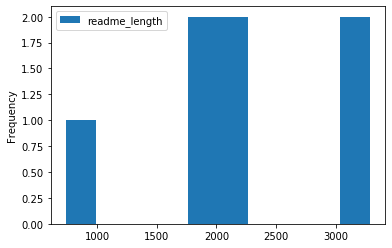

In [109]:
df[df.language == 'Go'].plot.hist()

In [121]:
df[df.language == 'Go'].sort_values(by='readme_length', ascending=True)

,language,original,normalized,stemmed,lemmatized,cleaned,readme_length
94,Go,Origin Kubernetes\n=================\n\n[![Go ...,origin kubernetes repor...,origin kubernet report card http goreportcard ...,origin kubernetes report card http goreportcar...,report card goreportcard badge goreportcard re...,737
14,Go,# Prometheus Go client library\n\n[![Build Sta...,prometheus client library build status h...,prometheu client librari build statu http trav...,prometheus client library build status http tr...,client library build status travis org client ...,1785
97,Go,# Kubernetes\n\n[![GoDoc Widget]][GoDoc] [![CI...,kubernetes godoc widget godoc cii be...,kubernet godoc widget godoc cii best practic h...,kubernetes godoc widget godoc cii best practic...,godoc widget godoc cii best practice bestpract...,1963
86,Go,The Moby Project\n================\n\n![Moby P...,the moby project moby proj...,the mobi project mobi project logo doc static ...,the moby project moby project logo doc static ...,project project logo doc static file project l...,2223
35,Go,Golint is a linter for Go source code.\n\n[![B...,golint linter for source code build st...,golint linter for sourc code build statu http ...,golint linter for source code build status htt...,golint linter source code build status travis ...,2229
99,Go,"<img src=""http://cdn2-cloud66-com.s3.amazonaws...",img src http cdn cloud com amazonaws c...,img src http cdn cloud com amazonaw com imag o...,img src http cdn cloud com amazonaws com image...,img src cdn cloud amazonaws image os sponsorsh...,3108
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",img src https rclone org img logo light h...,img src http rclone org img logo light horizon...,img src http rclone org img logo light horizon...,img src org img logo light horizontal color sv...,3289


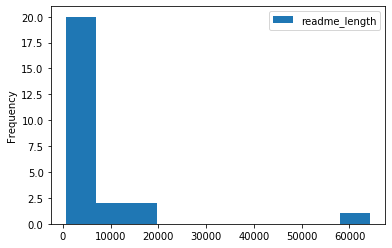

In [120]:
df[df.language == 'JavaScript'].plot.hist()

In [119]:
df[df.language == 'JavaScript'].sort_values(by='readme_length', ascending=True)

,language,original,normalized,stemmed,lemmatized,cleaned,readme_length
76,JavaScript,# Cumulus\nA SoundCloud player that lives in y...,cumulus soundcloud player that lives your me...,cumulu soundcloud player that live your menuba...,cumulus soundcloud player that life your menub...,cumulus soundcloud player life menubar release...,619
49,JavaScript,## [What Is Code?](http://www.bloomberg.com/wh...,what code http www bloomberg com whatisco...,what code http www bloomberg com whatiscod bus...,what code http www bloomberg com whatiscode bu...,code bloomberg businessweek june paul ford twi...,892
89,JavaScript,# Graphite-Web\n\n[![Codacy Badge](https://api...,graphite web codacy badge https api cod...,graphit web codaci badg http api codaci com pr...,graphite web codacy badge http api codacy com ...,graphite web codacy badge api codacy project b...,1174
24,JavaScript,# CSScomb [![CSSComb](logo.png)](http://csscom...,csscomb csscomb logo png http csscomb ...,csscomb csscomb logo png http csscomb com buil...,csscomb csscomb logo png http csscomb com buil...,logo png build status travis org svg branch ma...,1787
43,JavaScript,"# Meme v.2\n\nContributors: Yuri Victor, Joshu...",meme contributors yuri victor joshua ben...,meme contributor yuri victor joshua benton mat...,meme contributor yuri victor joshua benton mat...,contributor yuri victor joshua benton matt mon...,1979
26,JavaScript,"<h1 align=""center"">\n <br>\n <a href=""https:...",align center href https htmlhin...,align center href http htmlhint com img src ht...,align center href http htmlhint com img src ht...,align center href img src raw githubuserconten...,2100
45,JavaScript,nprviz's Project Template\n===================...,nprviz project template ...,nprviz project templat about thi templat about...,nprviz project template about this template ab...,nprviz project template template template assu...,2127
75,JavaScript,[![Join the chat at https://gitter.im/Soundnod...,join the chat https gitter soundnode sound...,join the chat http gitter soundnod soundnod ap...,join the chat http gitter soundnode soundnode ...,join chat gitter soundnode soundnode app badge...,2266
18,JavaScript,three.js\n========\n\n[![NPM package][npm]][np...,three npm package npm npm url...,three npm packag npm npm url build size build ...,three npm package npm npm url build size build...,three npm package npm npm url build size build...,2314
28,JavaScript,[![npm version](https://img.shields.io/npm/v/c...,npm version https img shields npm csslint...,npm version http img shield npm csslint svg ht...,npm version http img shield npm csslint svg ht...,npm version img shield npm svg npmjs package b...,2346


In [73]:
len(df.cleaned[4])

339

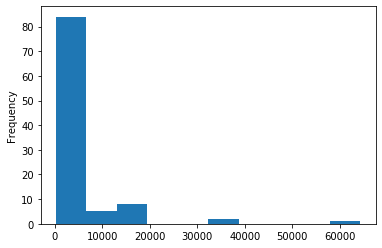

In [71]:
df.readme_length.plot.hist()

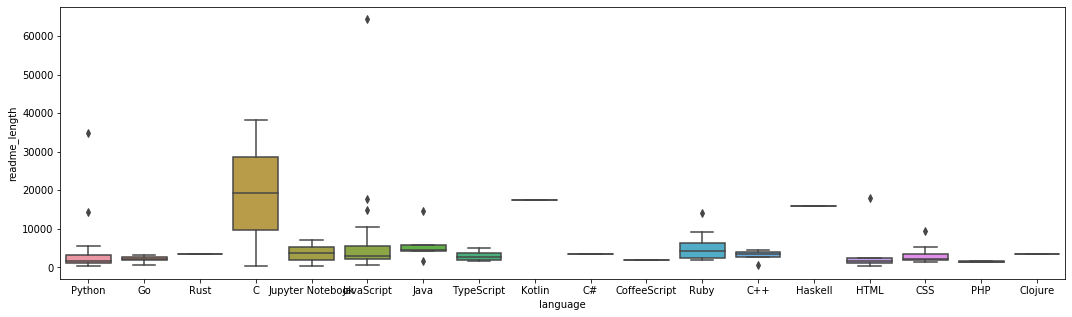

In [124]:

plt.figure(figsize=(18,5))
sns.boxplot(data=df, y="readme_length", x='language')

### Modeling

In [55]:
documents = df.cleaned.to_dict()

In [56]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(documents.values())

In [57]:
features_df = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
features_df.head()

,aaa,aaaaaa,aac,aacecc,aaf,aaojmfs,aardvark,aaron,ab,aba,...,zram,zrzmjddxrve,zsol,zsolt,zulip,zulipchat,zurb,zuul,zvrw,zxuypkodwof
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
X = tfidf.fit_transform(df.cleaned)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

**Logistic Regression**

In [59]:
lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [60]:
train.head()

,actual,predicted
35,Go,Go
88,JavaScript,JavaScript
19,TypeScript,JavaScript
29,Python,Python
31,Python,Python


In [61]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 68.75%
---
Confusion Matrix
actual      C  C#  C++  CSS  Clojure  Go  HTML  Haskell  Java  JavaScript  \
predicted                                                                   
CSS         0   0    0    8        0   0     0        0     0           0   
Go          0   0    0    0        0   7     0        0     0           0   
JavaScript  1   1    2    0        1   0     4        1     4          19   
Python      0   0    1    0        0   0     0        0     0           0   
Ruby        0   0    0    0        0   0     0        0     0           0   

actual      Jupyter Notebook  Kotlin  PHP  Python  Ruby  Rust  TypeScript  
predicted                                                                  
CSS                        0       0    0       0     0     0           0  
Go                         0       0    0       0     0     0           0  
JavaScript                 1       1    2       0     2     1           3  
Python                     0       0    0 

In [62]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 35.00%
---
Confusion Matrix
actual      C  C++  CSS  CoffeeScript  HTML  Java  JavaScript  \
predicted                                                       
JavaScript  1    1    1             1     1     1           6   
Python      0    0    0             0     0     0           0   

actual      Jupyter Notebook  Python  Ruby  TypeScript  
predicted                                               
JavaScript                 1       4     1           1  
Python                     0       1     0           0  
---
                  precision    recall  f1-score   support

               C       0.00      0.00      0.00         1
             C++       0.00      0.00      0.00         1
             CSS       0.00      0.00      0.00         1
    CoffeeScript       0.00      0.00      0.00         1
            HTML       0.00      0.00      0.00         1
            Java       0.00      0.00      0.00         1
      JavaScript       0.32      1.00      0.48         6
Jupy

In [63]:
train.predicted.head()

35            Go
88    JavaScript
19    JavaScript
29        Python
31        Python
Name: predicted, dtype: object

**Decision Tasks:**
- stem vs lemmatize? evaluate df
- finalize regex
- normalize language column

**Explore:**
- ngram
- word clouds
    
**Modeling**
- classification models